In [21]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt

In [38]:

# Initialize wandb API
api = wandb.Api()

# Replace 'your_sweep_id' with your actual sweep ID
sweep_ids = ['1hebjqf1', '3j9hgrdd', 'zyp3k1lv', 'msp6e8z3'] #,'rv3366qj'] 
project = 'maximes_other_crew/SeqBench_GSC/'


sweep_params = ['feat_size', 'model', 'test_dur', 'd_state', 'dt_rank', 'dt_relu', 'noise']#'seed', 
metric = 'test_acc' #'test_KL_div' #

In [39]:
# Initialize an empty DataFrame to hold the relevant data
data = []

for sweep_id in sweep_ids:

    # Fetch the sweep object
    sweep = api.sweep(project+sweep_id)

    # Fetch all runs in the sweep
    runs = sweep.runs
    # Extract the necessary data from each run
    for run in runs:
        config = run.config
        summary = run.summary
        feat_size = config.get('feat_size')
        model = config.get('model')
        # seed = config.get('seed')
        test_dur = config.get('test_dur')
        sched_factor = config.get('scheduler_factor')
        d_state = config.get('d_state')
        dt_rank = config.get('dt_rank')
        dt_relu = config.get('dt_relu')
        noise = config.get('train_noise')
        test_value = summary.get(metric)

        if test_value is not None:
            data.append({
                'feat_size': feat_size,
                'model': model,
                # 'seed': seed,
                'test_dur': test_dur,
                metric: test_value,
                'd_state': d_state,
                'dt_rank': dt_rank,
                'dt_relu': dt_relu,
                'noise': noise
            })



In [40]:
data

[{'feat_size': 256,
  'model': 'mamba',
  'test_dur': 2000,
  'test_acc': 0.9138898253440856,
  'd_state': 64,
  'dt_rank': 128,
  'dt_relu': 'mlp',
  'noise': 0},
 {'feat_size': 256,
  'model': 'mamba',
  'test_dur': 2000,
  'test_acc': 0.9217131733894348,
  'd_state': 64,
  'dt_rank': 128,
  'dt_relu': 'mlp',
  'noise': 0},
 {'feat_size': 256,
  'model': 'mamba',
  'test_dur': 2000,
  'test_acc': 0.9028802514076232,
  'd_state': 64,
  'dt_rank': 128,
  'dt_relu': 'mlp',
  'noise': 0},
 {'feat_size': 256,
  'model': 'mamba',
  'test_dur': 2000,
  'test_acc': 0.9007598161697388,
  'd_state': 64,
  'dt_rank': 128,
  'dt_relu': 'relu',
  'noise': 0},
 {'feat_size': 256,
  'model': 'mamba',
  'test_dur': 2000,
  'test_acc': 0.9080001711845398,
  'd_state': 64,
  'dt_rank': 128,
  'dt_relu': 'relu',
  'noise': 0},
 {'feat_size': 256,
  'model': 'mamba',
  'test_dur': 2000,
  'test_acc': 0.9228264093399048,
  'd_state': 64,
  'dt_rank': 128,
  'dt_relu': 'relu',
  'noise': 0},
 {'feat_size'

In [41]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Calculate the number of runs for each line configuration
df['run_count'] = df.groupby(sweep_params).transform('size')

# Group by n_layers and lr, then compute the mean of best_valid_acc for each group
df_grouped = df.groupby(sweep_params+ ['run_count']).agg({metric:['mean', 'std']}).reset_index()


df_grouped_sorted = df_grouped.sort_values(by=(metric,'mean'), ascending=False).reset_index(drop=True)

In [42]:
df_grouped_sorted[0:30]

feat_size  model test_dur d_state dt_rank dt_relu noise run_count  \
                                                                       
0        256  mamba      300      64     128    soft   0.0         3   
1        256  mamba      300      64      64    soft   0.0         3   
2        256  mamba      700      64     128    soft   0.0         3   
3        256  mamba      300      64       0    soft   0.0         3   
4        256  mamba      700      64      64    soft   0.0         3   
5        256  mamba      300      64     128     mlp   0.0         3   
6        256  mamba      700      64     128     mlp   0.0         3   
7        256  mamba      300      64      64    relu   0.0         3   
8        256  mamba     1000      64     128     mlp   0.0         3   
9        256  mamba      300      64     128    relu   0.0         3   
10       256  mamba      700      64      64    relu   0.0         3   
11       256  mamba     1000      64      64    relu   0.0         3   
12       256  mamba     2000      64     128     mlp   0.0         3   
13       256  mamba      700      64     128    relu   0.0         3   
14       256  mamba     2000      64      64    relu   0.0         3   
15       256  mamba     3000      64      64    relu   0.0         3   
16       256  mamba     1000      64     128    relu   0.0         3   
17       256  mamba     3000      64     128     mlp   0.0         3   
18       256  mamba     2000      64     128    relu   0.0         3   
19       256  mamba     3000      64     128    relu   0.0         3   
20       256  mamba     3000      64     128     mlp   0.1         3   
21       256  mamba     3000      64      64    relu   0.1         3   
22       256  mamba     3000      64     128    relu   0.1         3   
23       256  mamba      300      64       0    relu   0.0         3   
24       256  mamba      700      64       0    soft   0.0         3   
25       256  mamba     1000      64     128    soft   0.0         3   
26       256  mamba      300      64       0     mlp   0.0         3   
27       256  mamba      700      64       0    relu   0.0         3   
28       256  mamba     1000      64       0    relu   0.0         3   
29       256  mamba      300      64      64     mlp   0.0         3   

    test_acc            
        mean       std  
0   0.938979  0.005810  
1   0.935728  0.005080  
2   0.924133  0.008234  
3   0.922123  0.004635  
4   0.920548  0.007264  
5   0.919416  0.009364  
6   0.916462  0.009844  
7   0.915557  0.012233  
8   0.915248  0.009793  
9   0.914997  0.010209  
10  0.914018  0.012680  
11  0.913403  0.012886  
12  0.912828  0.009461  
13  0.912620  0.010729  
14  0.912354  0.013073  
15  0.911930  0.013215  
16  0.911797  0.010911  
17  0.911582  0.009260  
18  0.910529  0.011249  
19  0.910031  0.011403  
20  0.909637  0.009586  
21  0.909314  0.013198  
22  0.907783  0.011874  
23  0.904922  0.006051  
24  0.904882  0.007971  
25  0.901932  0.012403  
26  0.901613  0.013861  
27  0.900370  0.007262  
28  0.898571  0.007807  
29  0.897983  0.025786

In [27]:
len(data)

135

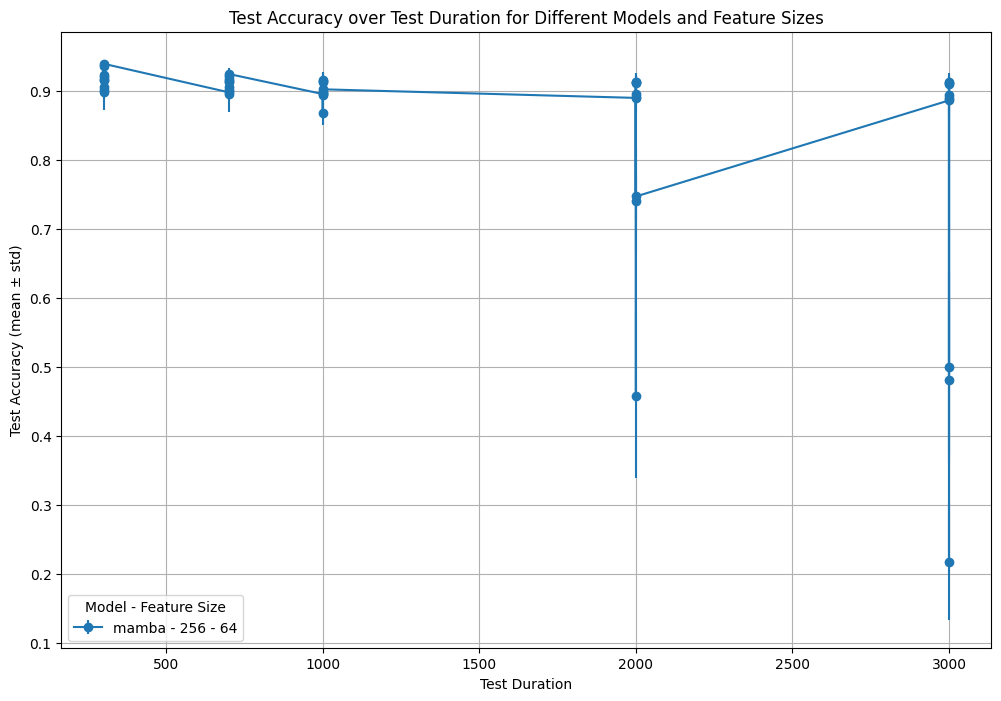

In [28]:
df = df_grouped

df['model'] = df['model'].astype('category')
df['feat_size'] = df['feat_size'].astype('category')
df['d_state'] = df['d_state'].astype('category')

# Plotting
plt.figure(figsize=(12, 8))

for model in df['model'].cat.categories:
    model_data = df[df['model'] == model]
    for size in model_data['feat_size'].cat.categories:
        size_data = model_data[model_data['feat_size'] == size]
        for d_state in model_data['d_state'].cat.categories:
            state_data = size_data[size_data['d_state'] == d_state]
            plt.errorbar(
                state_data['test_dur'],
                state_data[metric]['mean'],
                yerr=state_data[metric]['std'],
                label=f"{model} - {size} - {d_state}",
                fmt='-o'
            )

plt.xlabel('Test Duration')
plt.ylabel('Test Accuracy (mean ± std)')
plt.title('Test Accuracy over Test Duration for Different Models and Feature Sizes')
plt.legend(title='Model - Feature Size')
plt.grid(True)
plt.show()

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

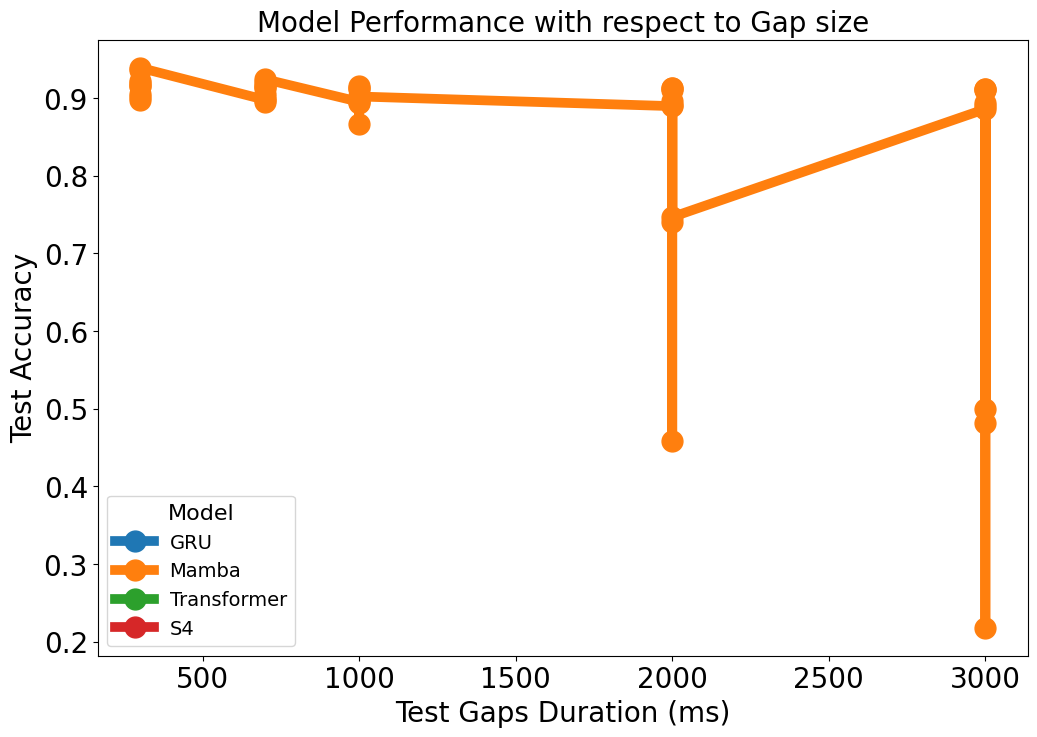

In [29]:
df = df_grouped

df['model'] = df['model'].astype('category')
df['feat_size'] = df['feat_size'].astype('category')

# Plotting
plt.figure(figsize=(12, 8))

selected_pairs = [('gru', 384, 'GRU'), ('mamba', 256, 'Mamba'), ('transformer', 256, 'Transformer'), ('s4', 512, 'S4')]


for model, size, label in selected_pairs:
    filtered_data = df[(df['model'] == model) & (df['feat_size'] == size)]
    
    
    plt.plot(
        filtered_data['test_dur'],
        filtered_data[metric]['mean'],
        label=label,
        marker='o',
        linewidth=7,
        markersize=15
    )

fontsize = 20
# Increase font sizes
plt.xlabel('Test Gaps Duration (ms)', fontsize=fontsize)
plt.ylabel('Test Accuracy', fontsize=fontsize)
plt.title('Model Performance with respect to Gap size', fontsize=20)

# Increase legend font size
plt.legend(title='Model', title_fontsize=16, fontsize=14)

ticksize = 20
# Increase tick parameters
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9, '0.9'),
  Text(0, 1.0, '1.0')])

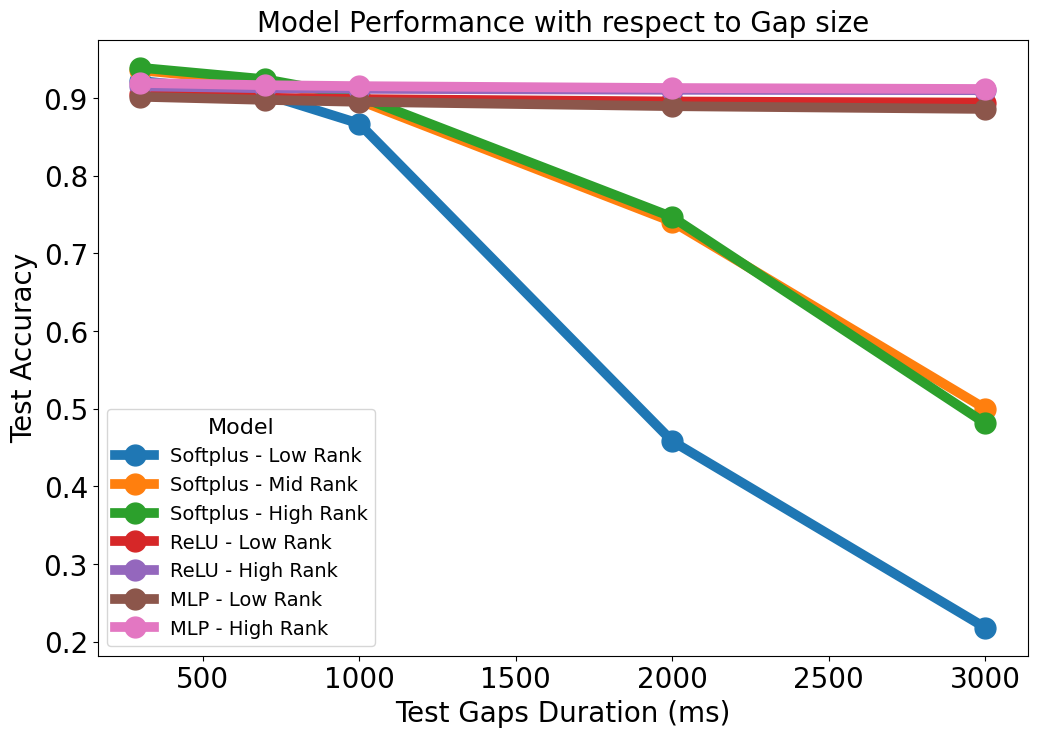

In [37]:
df = df_grouped

df['dt_relu'] = df['dt_relu'].astype('category')
df['dt_rank'] = df['dt_rank'].astype('category')

# Plotting
plt.figure(figsize=(12, 8))

selected_pairs = [('soft', 0, 'Softplus - Low Rank'), ('soft', 64, 'Softplus - Mid Rank'), ('soft', 128, 'Softplus - High Rank'), 
                  ('relu', 0, 'ReLU - Low Rank'), ('relu', 128, 'ReLU - High Rank'),
                  ('mlp', 0, 'MLP - Low Rank'),  ('mlp', 128, 'MLP - High Rank')]


for dt_relu, dt_rank, label in selected_pairs:
    filtered_data = df[(df['dt_relu'] == dt_relu) & (df['dt_rank'] == dt_rank)]
    
    
    plt.plot(
        filtered_data['test_dur'],
        filtered_data[metric]['mean'],
        label=label,
        marker='o',
        linewidth=7,
        markersize=15
    )

fontsize = 20
# Increase font sizes
plt.xlabel('Test Gaps Duration (ms)', fontsize=fontsize)
plt.ylabel('Test Accuracy', fontsize=fontsize)
plt.title('Model Performance with respect to Gap size', fontsize=20)

# Increase legend font size
plt.legend(title='Model', title_fontsize=16, fontsize=14)

ticksize = 20
# Increase tick parameters
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)

/tmp/ipykernel_2850100/1630530654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt_relu'] = df['dt_relu'].astype('category')
/tmp/ipykernel_2850100/1630530654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt_rank'] = df['dt_rank'].astype('category')


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

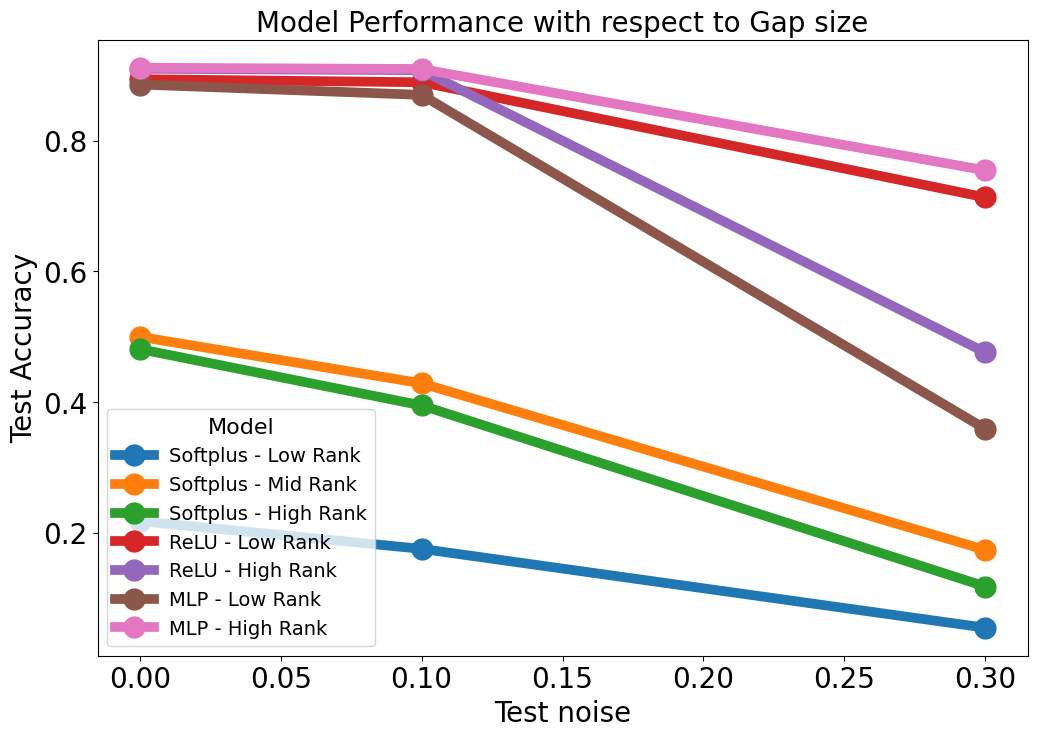

In [ ]:
df = df_grouped

df = df_grouped[df_grouped['test_dur'] == 3000]

df['dt_relu'] = df['dt_relu'].astype('category')
df['dt_rank'] = df['dt_rank'].astype('category')

# Plotting
plt.figure(figsize=(12, 8))

selected_pairs = [('soft', 0, 'Softplus - Low Rank'), ('soft', 64, 'Softplus - Mid Rank'), ('soft', 128, 'Softplus - High Rank'), 
                  ('relu', 0, 'ReLU - Low Rank'), ('relu', 128, 'ReLU - High Rank'),
                  ('mlp', 0, 'MLP - Low Rank'),  ('mlp', 128, 'MLP - High Rank')]


for dt_relu, dt_rank, label in selected_pairs:
    filtered_data = df[(df['dt_relu'] == dt_relu) & (df['dt_rank'] == dt_rank)]
    
    
    plt.plot(
        filtered_data['noise'],
        filtered_data[metric]['mean'],
        label=label,
        marker='o',
        linewidth=7,
        markersize=15
    )

fontsize = 20
# Increase font sizes
plt.xlabel('Relative test noise', fontsize=fontsize)
plt.ylabel('Test Accuracy', fontsize=fontsize)
plt.title('Model Performance with respect to test noise', fontsize=20)

# Increase legend font size
plt.legend(title='Model', title_fontsize=16, fontsize=14)

ticksize = 20
# Increase tick parameters
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)

In [31]:
import itertools

# Define the grid sweep parameters
param_grid = {
    "lr": [0.01, 0.005, 0.001],
    "n_layers": [2, 3, 4, 5, 6, 7],
    "n_layers": [2, 3, 4, 5, 6, 7],
    "pdrop": [0.1, 0.25, 0.5],
}

# List of all launched runs (as a list of dictionaries containing the parameters used in each run)
launched_runs = data

# Generate all possible parameter combinations (the full grid)
all_combinations = list(itertools.product(
    param_grid['lr'], param_grid['n_layers'], param_grid['pdrop']
))

# Function to convert tuples to dictionaries for easy comparison
def tuple_to_dict(param_tuple):
    return {
        "lr": param_tuple[0],
        "n_layers": param_tuple[1],
        "pdrop": param_tuple[2],
    }

# Convert all combinations to dicts
all_combinations_as_dicts = [tuple_to_dict(combo) for combo in all_combinations]

# Extract relevant fields from launched runs
def extract_relevant_params(launched_run):
    return {
        "lr": launched_run['lr'],
        "n_layers": launched_run['n_layers'],
        "pdrop": launched_run['pdrop'],
    }

# Extract relevant parameters from launched runs for comparison
launched_params = [extract_relevant_params(run) for run in launched_runs]

# Find missing runs
missing_runs = [combo for combo in all_combinations_as_dicts if combo not in launched_params]


KeyError: 'lr'

In [32]:
len(launched_params)

0

In [33]:
len(all_combinations_as_dicts)

54

In [34]:
len(missing_runs)

54

In [35]:
# Convert the data to a DataFrame for easier manipulation
df = pd.DataFrame(data)


df_grouped = df.groupby(sweep_params).agg({'best_valid_acc': ['mean', 'std']}).reset_index()

df_grouped_sorted = df_grouped.sort_values(by=('best_valid_acc','mean'), ascending=False).reset_index(drop=True)

KeyError: "Column(s) ['best_valid_acc'] do not exist"

In [36]:
df_grouped_sorted[0:10]

feat_size  model test_dur d_state dt_rank dt_relu noise run_count  test_acc  \
                                                                         mean   
0       256  mamba      300      64     128    soft     0         3  0.938979   
1       256  mamba      300      64      64    soft     0         3  0.935728   
2       256  mamba      700      64     128    soft     0         3  0.924133   
3       256  mamba      300      64       0    soft     0         3  0.922123   
4       256  mamba      700      64      64    soft     0         3  0.920548   
5       256  mamba      300      64     128     mlp     0         3  0.919416   
6       256  mamba      700      64     128     mlp     0         3  0.916462   
7       256  mamba      300      64      64    relu     0         3  0.915557   
8       256  mamba     1000      64     128     mlp     0         3  0.915248   
9       256  mamba      300      64     128    relu     0         3  0.914997   

             
        std  
0  0.005810  
1  0.005080  
2  0.008234  
3  0.004635  
4  0.007264  
5  0.009364  
6  0.009844  
7  0.012233  
8  0.009793  
9  0.010209